In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
sns.set()
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [2]:
raw_data = pd.read_csv('C:\\Users\\Legion\\Desktop\\Data Gate\\turbo.csv')
raw_data

,city,brand,model,year,body,color,engine,engine_power,fuel_type,mileage,gearbox,transmission,new,price
0,Bakı,Mercedes,E 240,1999,Sedan,Göy,2.4 L,170 a.g.,Benzin,358 000 km,Avtomat,Arxa,Xeyr,13 500
1,Bakı,Geely,MK,2012,Sedan,Ağ,1.5 L,98 a.g.,Benzin,260 000 km,Mexaniki,Ön,Xeyr,7 200
2,Sumqayıt,Mercedes,C 180,1995,Sedan,Gümüşü,1.8 L,122 a.g.,Benzin,355 600 km,Avtomat,Arxa,Xeyr,7 900
3,Bakı,Mercedes,E 240,1998,Sedan,Gümüşü,2.4 L,170 a.g.,Benzin,380 000 km,Avtomat,Tam,Xeyr,12 300
4,Bakı,Ford,Transit,2006,Furqon,Boz,2.2 L,140 a.g.,Dizel,225 000 km,Mexaniki,Ön,Xeyr,18 800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8493,Bakı,Chery,A-15 Cowin/Amulet,2008,Sedan,Ağ,1.5 L,110 a.g.,Benzin,29 000 km,Mexaniki,Ön,Xeyr,6 000
8494,Sumqayıt,Toyota,Land Cruiser,2008,Offroader / SUV,Ağ,4.5 L,235 a.g.,Dizel,344 000 km,Avtomat,Tam,Xeyr,39 500
8495,Bakı,Mitsubishi,Pajero,1996,Offroader / SUV,Göy,2.8 L,125 a.g.,Dizel,254 570 km,Avtomat,Tam,Xeyr,12 500
8496,Bakı,Kia,Rio,2005,Hetçbek / Liftbek,Qara,1.5 L,110 a.g.,Dizel,180 429 km,Mexaniki,Ön,Xeyr,12 700


## Preprosessing

In [3]:
engine = [e.strip(' L') for e in raw_data["engine"]]
engine_power = [ep.strip(' a.g') for ep in raw_data["engine_power"]]
mileage = [m.strip('km') for m in raw_data["mileage"]]
mileage = [ mm.replace(" ","") for mm in mileage]
price = [ p.replace(" ","") for p in raw_data["price"]]
price = [int(pp.strip(' €')) for pp in price]


raw_data["engine"] = engine
raw_data["engine_power"] = engine_power
raw_data["mileage"] = mileage
raw_data["price"] = price

raw_data["engine"] = raw_data["engine"].astype('float')
raw_data["engine_power"] = raw_data["engine_power"].astype('float')
raw_data["mileage"] = raw_data["mileage"].astype('int')
raw_data["price"] = raw_data["price"].astype('int')

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8498 entries, 0 to 8497
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          8498 non-null   object 
 1   brand         8498 non-null   object 
 2   model         8498 non-null   object 
 3   year          8498 non-null   int64  
 4   body          8498 non-null   object 
 5   color         8498 non-null   object 
 6   engine        8498 non-null   float64
 7   engine_power  8498 non-null   float64
 8   fuel_type     8498 non-null   object 
 9   mileage       8498 non-null   int32  
 10  gearbox       8498 non-null   object 
 11  transmission  8498 non-null   object 
 12  new           8498 non-null   object 
 13  price         8498 non-null   int32  
dtypes: float64(2), int32(2), int64(1), object(9)
memory usage: 863.2+ KB


In [5]:
raw_data.columns

Index(['city', 'brand', 'model', 'year', 'body', 'color', 'engine',
       'engine_power', 'fuel_type', 'mileage', 'gearbox', 'transmission',
       'new', 'price'],
      dtype='object')

In [6]:
raw_data.describe(include="all")

,city,brand,model,year,body,color,engine,engine_power,fuel_type,mileage,gearbox,transmission,new,price
count,8498,8498,8498,8498.000000,8498,8498,8498.000000,8498.000000,8498,8.498000e+03,8498,8498,8498,8498.000000
unique,61,105,722,NaN,16,17,NaN,NaN,5,NaN,4,3,2,NaN
top,Bakı,Mercedes,Astra,NaN,Sedan,Ağ,NaN,NaN,Benzin,NaN,Avtomat,Ön,Xeyr,NaN
freq,6063,1513,442,NaN,4478,2330,NaN,NaN,6762,NaN,5593,3832,8103,NaN
mean,NaN,NaN,NaN,2007.704519,NaN,NaN,2.284326,167.363733,NaN,1.823251e+05,NaN,NaN,NaN,20657.350318
std,NaN,NaN,NaN,8.379483,NaN,NaN,1.273656,92.098324,NaN,1.402902e+05,NaN,NaN,NaN,21102.741581
min,NaN,NaN,NaN,1962.000000,NaN,NaN,0.000000,2.000000,NaN,0.000000e+00,NaN,NaN,NaN,550.000000
25%,NaN,NaN,NaN,2003.000000,NaN,NaN,1.600000,105.000000,NaN,9.468775e+04,NaN,NaN,NaN,10300.000000
50%,NaN,NaN,NaN,2009.000000,NaN,NaN,2.000000,150.000000,NaN,1.670000e+05,NaN,NaN,NaN,15300.000000
75%,NaN,NaN,NaN,2014.000000,NaN,NaN,2.500000,192.000000,NaN,2.460000e+05,NaN,NaN,NaN,24200.000000


In [8]:
raw_data.isnull().sum()

city            0
brand           0
model           0
year            0
body            0
color           0
engine          0
engine_power    0
fuel_type       0
mileage         0
gearbox         0
transmission    0
new             0
price           0
dtype: int64

In [9]:
data = raw_data.copy()

## Removing The Outliers

<AxesSubplot:xlabel='price', ylabel='Density'>

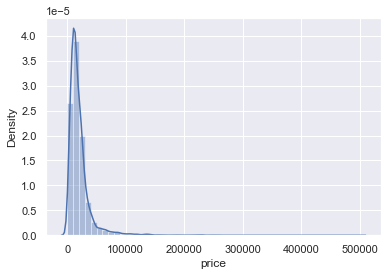

In [10]:
sns.distplot(data["price"])

<AxesSubplot:xlabel='price'>

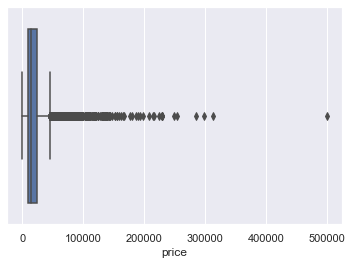

In [11]:
sns.boxplot(data['price'], orient='h')

In [14]:
data['brand'][data['price'] == 500000]

691    Rolls-Royce
Name: brand, dtype: object

In [15]:
data['brand'][data['mileage'] > 3500000]

7288    KamAz
Name: brand, dtype: object

In [16]:
q = data['price'].quantile(0.99)
data_1 = data[data['price']<q]
data_1.describe(include='all')

,city,brand,model,year,body,color,engine,engine_power,fuel_type,mileage,gearbox,transmission,new,price
count,8413,8413,8413,8413.000000,8413,8413,8413.000000,8413.000000,8413,8.413000e+03,8413,8413,8413,8413.000000
unique,61,102,710,NaN,16,17,NaN,NaN,5,NaN,4,3,2,NaN
top,Bakı,Mercedes,Astra,NaN,Sedan,Ağ,NaN,NaN,Benzin,NaN,Avtomat,Ön,Xeyr,NaN
freq,5978,1492,442,NaN,4465,2319,NaN,NaN,6685,NaN,5509,3832,8059,NaN
mean,NaN,NaN,NaN,2007.590277,NaN,NaN,2.266326,164.595864,NaN,1.840451e+05,NaN,NaN,NaN,19282.327945
std,NaN,NaN,NaN,8.340107,NaN,NaN,1.262323,87.591004,NaN,1.399332e+05,NaN,NaN,NaN,15016.200184
min,NaN,NaN,NaN,1962.000000,NaN,NaN,0.000000,2.000000,NaN,0.000000e+00,NaN,NaN,NaN,550.000000
25%,NaN,NaN,NaN,2003.000000,NaN,NaN,1.600000,105.000000,NaN,9.700000e+04,NaN,NaN,NaN,10200.000000
50%,NaN,NaN,NaN,2008.000000,NaN,NaN,2.000000,147.000000,NaN,1.680000e+05,NaN,NaN,NaN,15200.000000
75%,NaN,NaN,NaN,2013.000000,NaN,NaN,2.500000,190.000000,NaN,2.470000e+05,NaN,NaN,NaN,23900.000000


In [17]:
len(data['price'])

8498

In [18]:
data['price'].quantile(0.99)

109024.00000000052

In [19]:
len(data[data['price'] > 109024])

85

<AxesSubplot:xlabel='price', ylabel='Density'>

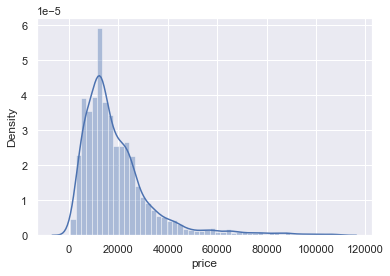

In [20]:
sns.distplot(data_1['price'])

<AxesSubplot:xlabel='price'>

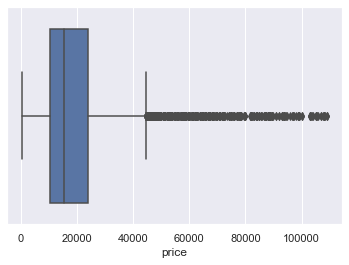

In [21]:
sns.boxplot(data_1['price'], orient='h')

In [22]:
data_1

,city,brand,model,year,body,color,engine,engine_power,fuel_type,mileage,gearbox,transmission,new,price
0,Bakı,Mercedes,E 240,1999,Sedan,Göy,2.4,170.0,Benzin,358000,Avtomat,Arxa,Xeyr,13500
1,Bakı,Geely,MK,2012,Sedan,Ağ,1.5,98.0,Benzin,260000,Mexaniki,Ön,Xeyr,7200
2,Sumqayıt,Mercedes,C 180,1995,Sedan,Gümüşü,1.8,122.0,Benzin,355600,Avtomat,Arxa,Xeyr,7900
3,Bakı,Mercedes,E 240,1998,Sedan,Gümüşü,2.4,170.0,Benzin,380000,Avtomat,Tam,Xeyr,12300
4,Bakı,Ford,Transit,2006,Furqon,Boz,2.2,140.0,Dizel,225000,Mexaniki,Ön,Xeyr,18800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8493,Bakı,Chery,A-15 Cowin/Amulet,2008,Sedan,Ağ,1.5,110.0,Benzin,29000,Mexaniki,Ön,Xeyr,6000
8494,Sumqayıt,Toyota,Land Cruiser,2008,Offroader / SUV,Ağ,4.5,235.0,Dizel,344000,Avtomat,Tam,Xeyr,39500
8495,Bakı,Mitsubishi,Pajero,1996,Offroader / SUV,Göy,2.8,125.0,Dizel,254570,Avtomat,Tam,Xeyr,12500
8496,Bakı,Kia,Rio,2005,Hetçbek / Liftbek,Qara,1.5,110.0,Dizel,180429,Mexaniki,Ön,Xeyr,12700


<AxesSubplot:xlabel='mileage', ylabel='Density'>

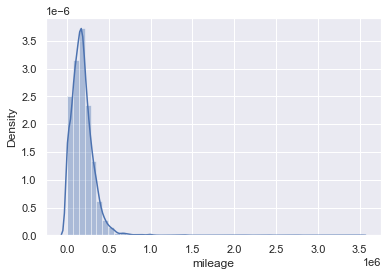

In [23]:
sns.distplot(data_1['mileage'])

<AxesSubplot:xlabel='mileage'>

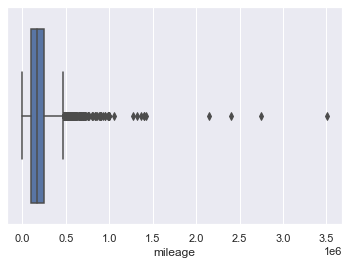

In [24]:
sns.boxplot(data_1['mileage'], orient='h')

In [25]:
q = data_1['mileage'].quantile(0.99)
data_2 = data_1[data_1['mileage']<q]
data_2.describe(include='all')

,city,brand,model,year,body,color,engine,engine_power,fuel_type,mileage,gearbox,transmission,new,price
count,8328,8328,8328,8328.000000,8328,8328,8328.000000,8328.000000,8328,8328.000000,8328,8328,8328,8328.000000
unique,61,99,696,NaN,16,17,NaN,NaN,5,NaN,4,3,2,NaN
top,Bakı,Mercedes,Astra,NaN,Sedan,Ağ,NaN,NaN,Benzin,NaN,Avtomat,Ön,Xeyr,NaN
freq,5928,1463,442,NaN,4432,2291,NaN,NaN,6650,NaN,5485,3819,7974,NaN
mean,NaN,NaN,NaN,2007.678074,NaN,NaN,2.240862,164.401897,NaN,176982.271134,NaN,NaN,NaN,19260.737992
std,NaN,NaN,NaN,8.284061,NaN,NaN,1.167507,87.025448,NaN,112346.492521,NaN,NaN,NaN,14913.464668
min,NaN,NaN,NaN,1962.000000,NaN,NaN,0.000000,2.000000,NaN,0.000000,NaN,NaN,NaN,550.000000
25%,NaN,NaN,NaN,2003.000000,NaN,NaN,1.600000,105.000000,NaN,96000.000000,NaN,NaN,NaN,10200.000000
50%,NaN,NaN,NaN,2009.000000,NaN,NaN,2.000000,148.000000,NaN,167000.000000,NaN,NaN,NaN,15200.000000
75%,NaN,NaN,NaN,2013.000000,NaN,NaN,2.500000,190.000000,NaN,243640.250000,NaN,NaN,NaN,23900.000000


In [26]:
len(data_1[data_1['mileage'] > q])

85

In [27]:
data_1['mileage'].quantile(0.99)

582739.2799999916

<AxesSubplot:xlabel='mileage', ylabel='Density'>

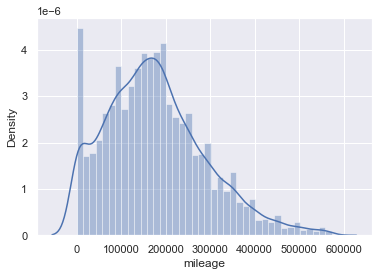

In [28]:
sns.distplot(data_2['mileage'])

<AxesSubplot:xlabel='mileage'>

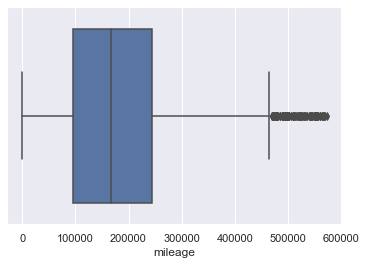

In [29]:
sns.boxplot(data_2['mileage'], orient='h')

In [30]:
data['engine'].max()

16.0

<AxesSubplot:xlabel='engine', ylabel='Density'>

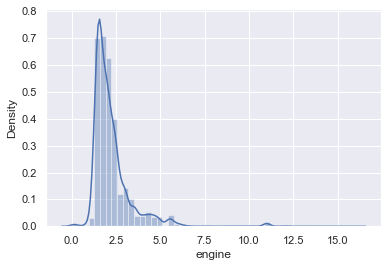

In [31]:
sns.distplot(data_2['engine'])

<AxesSubplot:xlabel='engine'>

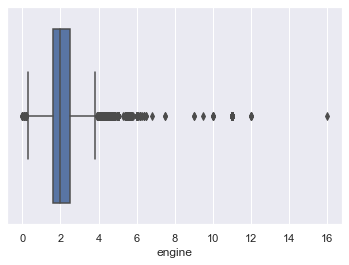

In [32]:
sns.boxplot(data_2['engine'], orient='h')

In [33]:
q = data_2['engine'].quantile(0.99)
q2 = data_2['engine'].quantile(0.01)
data_3 = data_2[data_2['engine'] < q]
data_4 = data_3[data_3['engine'] > q2]
data_4.describe(include='all')

,city,brand,model,year,body,color,engine,engine_power,fuel_type,mileage,gearbox,transmission,new,price
count,8112,8112,8112,8112.000000,8112,8112,8112.000000,8112.000000,8112,8112.000000,8112,8112,8112,8112.000000
unique,61,74,622,NaN,14,17,NaN,NaN,5,NaN,4,3,2,NaN
top,Bakı,Mercedes,Astra,NaN,Sedan,Ağ,NaN,NaN,Benzin,NaN,Avtomat,Ön,Xeyr,NaN
freq,5793,1455,442,NaN,4402,2243,NaN,NaN,6503,NaN,5404,3743,7762,NaN
mean,NaN,NaN,NaN,2007.778353,NaN,NaN,2.183050,164.265533,NaN,178188.566938,NaN,NaN,NaN,19243.623151
std,NaN,NaN,NaN,8.126144,NaN,NaN,0.878003,84.649870,NaN,112052.513479,NaN,NaN,NaN,14753.012453
min,NaN,NaN,NaN,1962.000000,NaN,NaN,1.300000,2.000000,NaN,0.000000,NaN,NaN,NaN,1000.000000
25%,NaN,NaN,NaN,2003.000000,NaN,NaN,1.600000,106.000000,NaN,98000.000000,NaN,NaN,NaN,10300.000000
50%,NaN,NaN,NaN,2009.000000,NaN,NaN,2.000000,149.000000,NaN,168000.000000,NaN,NaN,NaN,15300.000000
75%,NaN,NaN,NaN,2013.000000,NaN,NaN,2.500000,190.000000,NaN,245000.000000,NaN,NaN,NaN,23900.000000


In [34]:
q2

1.2

In [35]:
len(data_3[data_3['engine'] <= q2])

121

In [36]:
data_2['engine'].quantile(0.99)

6.0

In [37]:
len(data_2[data_2['engine'] >= q])

95

<AxesSubplot:xlabel='engine', ylabel='Density'>

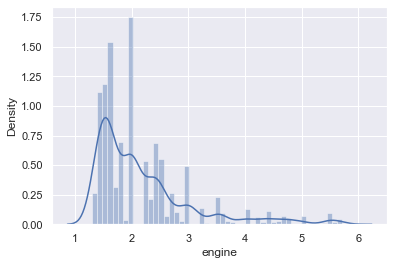

In [38]:
sns.distplot(data_4['engine'])

<AxesSubplot:xlabel='engine'>

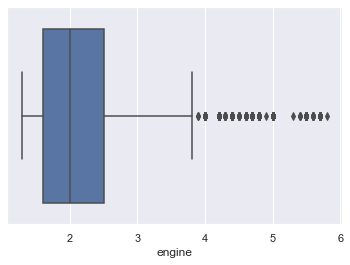

In [39]:
sns.boxplot(data_4['engine'], orient='h')

<AxesSubplot:xlabel='year', ylabel='Density'>

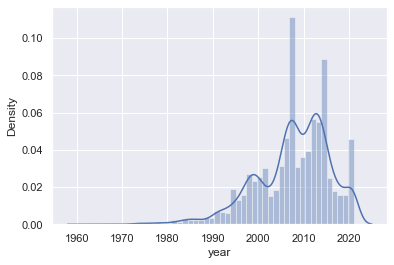

In [40]:
sns.distplot(data_4['year'])

<AxesSubplot:xlabel='year'>

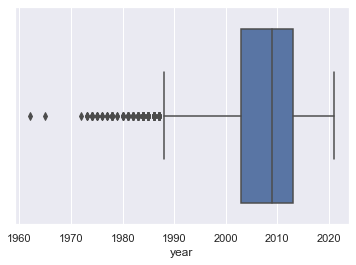

In [43]:
sns.boxplot(data_4['year'], orient='h')

In [43]:
q = data_4['year'].quantile(0.01)
data_5 = data_4[data_4['year']>q]

<AxesSubplot:xlabel='year', ylabel='Density'>

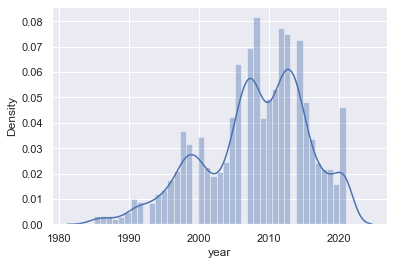

In [44]:
sns.distplot(data_5['year'])

In [45]:
q

1984.0

In [46]:
data_4.year.min()

1962

In [47]:
len(data_4[data_4['year']<q])

77

<AxesSubplot:xlabel='year'>

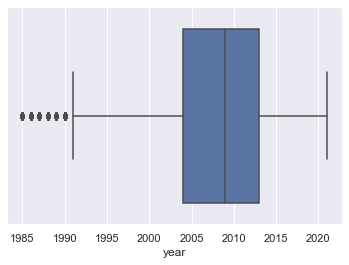

In [48]:
sns.boxplot(data_5['year'], orient='h')

In [49]:
data_5.describe(include='all')

,city,brand,model,year,body,color,engine,engine_power,fuel_type,mileage,gearbox,transmission,new,price
count,8010,8010,8010,8010.000000,8010,8010,8010.000000,8010.000000,8010,8010.000000,8010,8010,8010,8010.000000
unique,61,74,615,NaN,14,17,NaN,NaN,5,NaN,4,3,2,NaN
top,Bakı,Mercedes,Astra,NaN,Sedan,Ağ,NaN,NaN,Benzin,NaN,Avtomat,Ön,Xeyr,NaN
freq,5752,1450,442,NaN,4312,2207,NaN,NaN,6405,NaN,5400,3741,7660,NaN
mean,NaN,NaN,NaN,2008.131960,NaN,NaN,2.188177,165.310861,NaN,178128.687516,NaN,NaN,NaN,19433.317353
std,NaN,NaN,NaN,7.530166,NaN,NaN,0.878205,84.588976,NaN,111755.043010,NaN,NaN,NaN,14737.671754
min,NaN,NaN,NaN,1985.000000,NaN,NaN,1.300000,2.000000,NaN,0.000000,NaN,NaN,NaN,1000.000000
25%,NaN,NaN,NaN,2004.000000,NaN,NaN,1.600000,106.000000,NaN,98000.000000,NaN,NaN,NaN,10500.000000
50%,NaN,NaN,NaN,2009.000000,NaN,NaN,2.000000,150.000000,NaN,168000.000000,NaN,NaN,NaN,15500.000000
75%,NaN,NaN,NaN,2013.000000,NaN,NaN,2.500000,190.000000,NaN,245000.000000,NaN,NaN,NaN,23900.000000


In [50]:
data_5

,city,brand,model,year,body,color,engine,engine_power,fuel_type,mileage,gearbox,transmission,new,price
0,Bakı,Mercedes,E 240,1999,Sedan,Göy,2.4,170.0,Benzin,358000,Avtomat,Arxa,Xeyr,13500
1,Bakı,Geely,MK,2012,Sedan,Ağ,1.5,98.0,Benzin,260000,Mexaniki,Ön,Xeyr,7200
2,Sumqayıt,Mercedes,C 180,1995,Sedan,Gümüşü,1.8,122.0,Benzin,355600,Avtomat,Arxa,Xeyr,7900
3,Bakı,Mercedes,E 240,1998,Sedan,Gümüşü,2.4,170.0,Benzin,380000,Avtomat,Tam,Xeyr,12300
4,Bakı,Ford,Transit,2006,Furqon,Boz,2.2,140.0,Dizel,225000,Mexaniki,Ön,Xeyr,18800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8493,Bakı,Chery,A-15 Cowin/Amulet,2008,Sedan,Ağ,1.5,110.0,Benzin,29000,Mexaniki,Ön,Xeyr,6000
8494,Sumqayıt,Toyota,Land Cruiser,2008,Offroader / SUV,Ağ,4.5,235.0,Dizel,344000,Avtomat,Tam,Xeyr,39500
8495,Bakı,Mitsubishi,Pajero,1996,Offroader / SUV,Göy,2.8,125.0,Dizel,254570,Avtomat,Tam,Xeyr,12500
8496,Bakı,Kia,Rio,2005,Hetçbek / Liftbek,Qara,1.5,110.0,Dizel,180429,Mexaniki,Ön,Xeyr,12700


<AxesSubplot:xlabel='engine_power'>

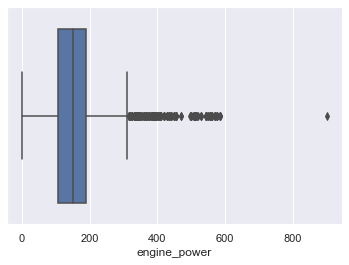

In [54]:
sns.boxplot(data_5['engine_power'])

In [70]:
data_5[data_5['engine_power'] < 65]  # too low engine_power, so we should remove these

,city,brand,model,year,body,color,engine,engine_power,fuel_type,mileage,gearbox,transmission,new,price
330,Bakı,Lifan,330,2014,Hetçbek / Liftbek,Qırmızı,1.3,58.0,Benzin,108000,Avtomat,Ön,Xeyr,8400
966,Bakı,Volkswagen,Polo,2001,Hetçbek / Liftbek,Qırmızı,1.4,60.0,Benzin,240000,Avtomat,Ön,Xeyr,5400
2247,Sumqayıt,Volvo,XC 60,2014,Offroader / SUV,Qırmızı,2.0,2.0,Benzin,129300,Avtomat,Tam,Xeyr,22500
4941,Bakı,LADA (VAZ),2106,1985,Sedan,Boz,1.3,64.0,Benzin,295000,Mexaniki,Arxa,Xeyr,3900
5378,Ağcabədi,LADA (VAZ),21011,1986,Sedan,Ağ,1.3,64.0,Benzin,274566,Mexaniki,Arxa,Xeyr,3500
6378,Sabirabad,LADA (VAZ),2106,1985,Sedan,Qırmızı,1.3,64.0,Benzin,300000,Mexaniki,Arxa,Xeyr,5500
7206,Salyan,LADA (VAZ),2107,1988,Sedan,Ağ,1.3,64.0,Benzin,111111,Mexaniki,Arxa,Xeyr,4000
7640,Bakı,LADA (VAZ),2106,1985,Sedan,Qırmızı,1.3,64.0,Benzin,300300,Mexaniki,Arxa,Xeyr,2550


In [65]:
q = data_5['engine_power'].quantile(0.99)
q2 = data_5['engine_power'].quantile(0.01)
data_6 = data_5[data_5['engine_power'] < q]
data_7 = data_6[data_6['engine_power'] >= q2]
data_7.describe(include='all')

,city,brand,model,year,body,color,engine,engine_power,fuel_type,mileage,gearbox,transmission,new,price
count,7915,7915,7915,7915.000000,7915,7915,7915.000000,7915.000000,7915,7915.000000,7915,7915,7915,7915.000000
unique,61,73,602,NaN,14,17,NaN,NaN,5,NaN,4,3,2,NaN
top,Bakı,Mercedes,Astra,NaN,Sedan,Ağ,NaN,NaN,Benzin,NaN,Avtomat,Ön,Xeyr,NaN
freq,5665,1412,442,NaN,4296,2182,NaN,NaN,6310,NaN,5311,3737,7565,NaN
mean,NaN,NaN,NaN,2008.095136,NaN,NaN,2.157347,161.309792,NaN,179000.581554,NaN,NaN,NaN,18966.084144
std,NaN,NaN,NaN,7.534550,NaN,NaN,0.827941,75.160970,NaN,111950.217816,NaN,NaN,NaN,13849.981023
min,NaN,NaN,NaN,1985.000000,NaN,NaN,1.300000,65.000000,NaN,0.000000,NaN,NaN,NaN,1000.000000
25%,NaN,NaN,NaN,2004.000000,NaN,NaN,1.600000,106.000000,NaN,98850.000000,NaN,NaN,NaN,10500.000000
50%,NaN,NaN,NaN,2009.000000,NaN,NaN,2.000000,149.000000,NaN,170000.000000,NaN,NaN,NaN,15300.000000
75%,NaN,NaN,NaN,2013.000000,NaN,NaN,2.400000,188.000000,NaN,246000.000000,NaN,NaN,NaN,23800.000000


In [66]:
len(data_5[data_5['engine_power'] >= q])

87

In [67]:
q

507.0

In [68]:
q2

65.0

<AxesSubplot:xlabel='engine_power'>

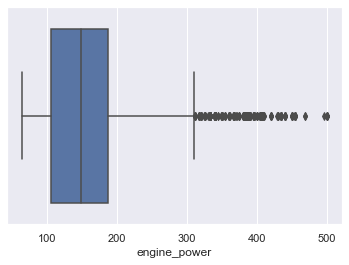

In [69]:
sns.boxplot(data_7['engine_power'])

In [71]:
data_cleaned = data_7.reset_index(drop=True)
data_cleaned

,city,brand,model,year,body,color,engine,engine_power,fuel_type,mileage,gearbox,transmission,new,price
0,Bakı,Mercedes,E 240,1999,Sedan,Göy,2.4,170.0,Benzin,358000,Avtomat,Arxa,Xeyr,13500
1,Bakı,Geely,MK,2012,Sedan,Ağ,1.5,98.0,Benzin,260000,Mexaniki,Ön,Xeyr,7200
2,Sumqayıt,Mercedes,C 180,1995,Sedan,Gümüşü,1.8,122.0,Benzin,355600,Avtomat,Arxa,Xeyr,7900
3,Bakı,Mercedes,E 240,1998,Sedan,Gümüşü,2.4,170.0,Benzin,380000,Avtomat,Tam,Xeyr,12300
4,Bakı,Ford,Transit,2006,Furqon,Boz,2.2,140.0,Dizel,225000,Mexaniki,Ön,Xeyr,18800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7910,Bakı,Chery,A-15 Cowin/Amulet,2008,Sedan,Ağ,1.5,110.0,Benzin,29000,Mexaniki,Ön,Xeyr,6000
7911,Sumqayıt,Toyota,Land Cruiser,2008,Offroader / SUV,Ağ,4.5,235.0,Dizel,344000,Avtomat,Tam,Xeyr,39500
7912,Bakı,Mitsubishi,Pajero,1996,Offroader / SUV,Göy,2.8,125.0,Dizel,254570,Avtomat,Tam,Xeyr,12500
7913,Bakı,Kia,Rio,2005,Hetçbek / Liftbek,Qara,1.5,110.0,Dizel,180429,Mexaniki,Ön,Xeyr,12700


In [72]:
data_cleaned.corr()

,year,engine,engine_power,mileage,price
year,1.000000,-0.017551,0.268783,-0.649220,0.593089
engine,-0.017551,1.000000,0.801201,0.049913,0.442196
engine_power,0.268783,0.801201,1.000000,-0.141637,0.614676
mileage,-0.649220,0.049913,-0.141637,1.000000,-0.424400
price,0.593089,0.442196,0.614676,-0.424400,1.000000


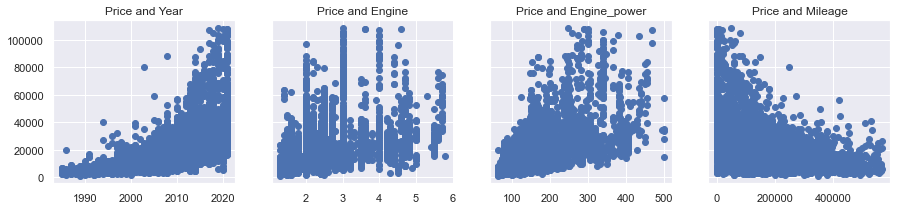

In [73]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize = (15,3))
ax1.scatter(data_cleaned['year'], data_cleaned['price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['engine'], data_cleaned['price'])
ax2.set_title('Price and Engine')
ax3.scatter(data_cleaned['engine_power'], data_cleaned['price'])
ax3.set_title('Price and Engine_power')
ax4.scatter(data_cleaned['mileage'], data_cleaned['price'])
ax4.set_title('Price and Mileage')
plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

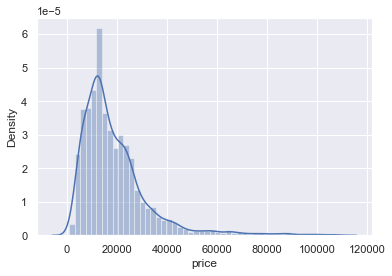

In [74]:
sns.distplot(data_cleaned['price'])

In [75]:
data_cleaned

,city,brand,model,year,body,color,engine,engine_power,fuel_type,mileage,gearbox,transmission,new,price
0,Bakı,Mercedes,E 240,1999,Sedan,Göy,2.4,170.0,Benzin,358000,Avtomat,Arxa,Xeyr,13500
1,Bakı,Geely,MK,2012,Sedan,Ağ,1.5,98.0,Benzin,260000,Mexaniki,Ön,Xeyr,7200
2,Sumqayıt,Mercedes,C 180,1995,Sedan,Gümüşü,1.8,122.0,Benzin,355600,Avtomat,Arxa,Xeyr,7900
3,Bakı,Mercedes,E 240,1998,Sedan,Gümüşü,2.4,170.0,Benzin,380000,Avtomat,Tam,Xeyr,12300
4,Bakı,Ford,Transit,2006,Furqon,Boz,2.2,140.0,Dizel,225000,Mexaniki,Ön,Xeyr,18800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7910,Bakı,Chery,A-15 Cowin/Amulet,2008,Sedan,Ağ,1.5,110.0,Benzin,29000,Mexaniki,Ön,Xeyr,6000
7911,Sumqayıt,Toyota,Land Cruiser,2008,Offroader / SUV,Ağ,4.5,235.0,Dizel,344000,Avtomat,Tam,Xeyr,39500
7912,Bakı,Mitsubishi,Pajero,1996,Offroader / SUV,Göy,2.8,125.0,Dizel,254570,Avtomat,Tam,Xeyr,12500
7913,Bakı,Kia,Rio,2005,Hetçbek / Liftbek,Qara,1.5,110.0,Dizel,180429,Mexaniki,Ön,Xeyr,12700


## Checking Multicollinearity

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['year', 'engine', 'engine_power', 'mileage']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif  # Drop column if VIF > 10

,VIF,Features
0,10.215932,year
1,23.508136,engine
2,17.272580,engine_power
3,3.904155,mileage


In [77]:
variables.columns

Index(['year', 'engine', 'engine_power', 'mileage'], dtype='object')

In [78]:
variables.shape

(7915, 4)

In [80]:
data_no_multicollinearity = data_cleaned.drop(['engine'],axis=1)    

In [84]:
data_no_multicollinearity.describe(include='all')

,city,brand,model,year,body,color,engine_power,fuel_type,mileage,gearbox,transmission,new,price
count,7915,7915,7915,7915.000000,7915,7915,7915.000000,7915,7915.000000,7915,7915,7915,7915.000000
unique,61,73,602,NaN,14,17,NaN,5,NaN,4,3,2,NaN
top,Bakı,Mercedes,Astra,NaN,Sedan,Ağ,NaN,Benzin,NaN,Avtomat,Ön,Xeyr,NaN
freq,5665,1412,442,NaN,4296,2182,NaN,6310,NaN,5311,3737,7565,NaN
mean,NaN,NaN,NaN,2008.095136,NaN,NaN,161.309792,NaN,179000.581554,NaN,NaN,NaN,18966.084144
std,NaN,NaN,NaN,7.534550,NaN,NaN,75.160970,NaN,111950.217816,NaN,NaN,NaN,13849.981023
min,NaN,NaN,NaN,1985.000000,NaN,NaN,65.000000,NaN,0.000000,NaN,NaN,NaN,1000.000000
25%,NaN,NaN,NaN,2004.000000,NaN,NaN,106.000000,NaN,98850.000000,NaN,NaN,NaN,10500.000000
50%,NaN,NaN,NaN,2009.000000,NaN,NaN,149.000000,NaN,170000.000000,NaN,NaN,NaN,15300.000000
75%,NaN,NaN,NaN,2013.000000,NaN,NaN,188.000000,NaN,246000.000000,NaN,NaN,NaN,23800.000000


In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_no_multicollinearity[['year', 'engine_power', 'mileage']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,9.259422,year
1,5.739608,engine_power
2,3.597545,mileage


In [86]:
data_no_multicollinearity

,city,brand,model,year,body,color,engine_power,fuel_type,mileage,gearbox,transmission,new,price
0,Bakı,Mercedes,E 240,1999,Sedan,Göy,170.0,Benzin,358000,Avtomat,Arxa,Xeyr,13500
1,Bakı,Geely,MK,2012,Sedan,Ağ,98.0,Benzin,260000,Mexaniki,Ön,Xeyr,7200
2,Sumqayıt,Mercedes,C 180,1995,Sedan,Gümüşü,122.0,Benzin,355600,Avtomat,Arxa,Xeyr,7900
3,Bakı,Mercedes,E 240,1998,Sedan,Gümüşü,170.0,Benzin,380000,Avtomat,Tam,Xeyr,12300
4,Bakı,Ford,Transit,2006,Furqon,Boz,140.0,Dizel,225000,Mexaniki,Ön,Xeyr,18800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7910,Bakı,Chery,A-15 Cowin/Amulet,2008,Sedan,Ağ,110.0,Benzin,29000,Mexaniki,Ön,Xeyr,6000
7911,Sumqayıt,Toyota,Land Cruiser,2008,Offroader / SUV,Ağ,235.0,Dizel,344000,Avtomat,Tam,Xeyr,39500
7912,Bakı,Mitsubishi,Pajero,1996,Offroader / SUV,Göy,125.0,Dizel,254570,Avtomat,Tam,Xeyr,12500
7913,Bakı,Kia,Rio,2005,Hetçbek / Liftbek,Qara,110.0,Dizel,180429,Mexaniki,Ön,Xeyr,12700


In [88]:
data_no_multicollinearity.columns = ["City", "Brand", "Model", "Year", "Body", "Color", "Engine_Power", "Fuel_Type", "Mileage", "Gearbox", "Transmission", "New", "Price"]
data_no_multicollinearity

,City,Brand,Model,Year,Body,Color,Engine_Power,Fuel_Type,Mileage,Gearbox,Transmission,New,Price
0,Bakı,Mercedes,E 240,1999,Sedan,Göy,170.0,Benzin,358000,Avtomat,Arxa,Xeyr,13500
1,Bakı,Geely,MK,2012,Sedan,Ağ,98.0,Benzin,260000,Mexaniki,Ön,Xeyr,7200
2,Sumqayıt,Mercedes,C 180,1995,Sedan,Gümüşü,122.0,Benzin,355600,Avtomat,Arxa,Xeyr,7900
3,Bakı,Mercedes,E 240,1998,Sedan,Gümüşü,170.0,Benzin,380000,Avtomat,Tam,Xeyr,12300
4,Bakı,Ford,Transit,2006,Furqon,Boz,140.0,Dizel,225000,Mexaniki,Ön,Xeyr,18800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7910,Bakı,Chery,A-15 Cowin/Amulet,2008,Sedan,Ağ,110.0,Benzin,29000,Mexaniki,Ön,Xeyr,6000
7911,Sumqayıt,Toyota,Land Cruiser,2008,Offroader / SUV,Ağ,235.0,Dizel,344000,Avtomat,Tam,Xeyr,39500
7912,Bakı,Mitsubishi,Pajero,1996,Offroader / SUV,Göy,125.0,Dizel,254570,Avtomat,Tam,Xeyr,12500
7913,Bakı,Kia,Rio,2005,Hetçbek / Liftbek,Qara,110.0,Dizel,180429,Mexaniki,Ön,Xeyr,12700


## Splitting the dataset into the Training set and Test set

In [90]:
X = data_no_multicollinearity.drop(['Price'], axis=1)
y = data_no_multicollinearity['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Regressor

In [95]:
transformer = ColumnTransformer(transformers = [
    ('one_hot_encoder', OneHotEncoder(sparse=False, categories = 'auto', handle_unknown="ignore"),
    ['City', 'Brand', 'Model', 'Body', 'Color', 'Fuel_Type', 'Gearbox', 'Transmission', "New"])], remainder = 'passthrough')

model = RandomForestRegressor(n_estimators=100, random_state=42)

pipe = Pipeline(steps=[('preprocessor', transformer), ('model', model)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['City', 'Brand', 'Model',
                                                   'Body', 'Color', 'Fuel_Type',
                                                   'Gearbox', 'Transmission',
                                                   'New'])])),
                ('model', RandomForestRegressor(random_state=42))])

### Evaluating The Training Set

In [96]:
print('MAE:', mean_absolute_error(y_train, pipe.predict(X_train)))
print('MSE:', mean_absolute_error(y_train, pipe.predict(X_train)))
print('R2_score:', r2_score(y_train, pipe.predict(X_train)))

MAE: 928.3310981512697
MSE: 928.3310981512697
R2_score: 0.9838649587415871


### Evaluating The Testing Set

In [97]:
print('MAE:', mean_absolute_error(y_test, pipe.predict(X_test)))
print('MSE:', mean_absolute_error(y_test, pipe.predict(X_test)))
print('R2_score:', r2_score(y_test, pipe.predict(X_test)))

MAE: 2379.1380745019
MSE: 2379.1380745019
R2_score: 0.8968515969205125


### Example Price Prediction

In [122]:
prediction = np.array(["Bakı", "Mercedes", "C 180", "1998", "Sedan", "Ağ", 122.0, "Benzin", 200000, "Avtomat", "Arxa", "Xeyr"])
prediction = prediction.reshape(1, 12)
df = pd.DataFrame(data=prediction, index=np.arange(len(query)), 
                    columns=['City', 'Brand', 'Model', 'Year', 'Body', 'Color', 'Engine_Power', 'Fuel_Type', 'Mileage', 'Gearbox', 'Transmission', "New"])
pipe.predict(df)

array([11960.])

## Exporting our model and dataset


In [120]:
import pickle
pickle.dump(pipe, open('model.pkl', 'wb'))
data_no_multicollinearity.to_csv('cleaned_data.csv', index=False)